#  <span style="color:blue">Introduction</span> 



## About CRIM

CRIM (Computer Research Institute Montreal) is a government funded innovation and information technology research center which provides cutting edge technology solutions for various government and corporate stakeholders. 

CRIM has 3 main verticals:

1. Analytics and Artificial Intelligence
2. Human related technology
3. Software science and technology


I am currently working with the Natural Language Processing unit of the Analytics and Artificial Intelligence division on a capstone project.



## Project Motivation

- One of the main deliverables of the NLP team at CRIM is curating and releasing databases and corpuses which are then used for linguistic research and software development.

- One of the fundamental tools used for corpus exploration is a Concordancer, which in layman terms is a tool to explore the frequency and usage of a given query word in a corpus.

![concordance_output](Images/nltk_concordance.png)


## What is a concordancer ?

A concordancer is a tool to explore the text in a corpus(i.e large dataset of text documents).
A concordancer helps linguists and language learners get acquainted with multiple uses of words and phrases. 



For example a student learning english wants to know where he/she can use the word <span style = "color:red">"WORN"</span>

A single word can be used in many different contexts. The word "worn" has 4 different meanings wrt to usage.

![worn_dictionary](Images/worn_dictionary.png)



## Design Problem


- The design challenge was to create a new version of a concordancer which can understand the meaning of the sentences it returns.

- Once the concordancer has the ability to recognize the different meanings of sentences it can then select representative samples to highlight the different ways a single word has been used in the corpus.

- This is done with the objective of providing targeted insight from a big data corpus.


# <span style = "color:blue">DESIGN PLAN</span> 

![Process](Images/Process_breakdown.png)

# <span style = "color:green">STAGE 1</span>

## IDENTIFYING STRENGTHS AND WEAKNESSES OF CURRENT MARKET OFFERINGS

## The concordancers in use today simply return all sentences in a corpus that contain the search word.

But we want to create a concordancing tool that can effectively show all the different ways a word can be used to convey different meanings in a sentence. 

We want our output, for search word like 'worn' to look like this:

- Context 1. <span style = "color:green">"I haven't worn my new dress yet."</span> 

- Context 2. <span style = "color:red">"Breakfast had long since worn off and they were hungry."</span> 

- Context 3. <span style = "color:blue">"The corner and edges are worn off and the wood is exposed."</span>

- Context 4. <span style = "color:black">"She was so worn out that she fell asleep at the table."</span>











.

In [3]:
import nltk
import numpy as np
from nltk.text import Text  
from  nltk.text import ConcordanceIndex
import gensim 
from gensim.models import Word2Vec 
from gensim.test.utils import common_texts, get_tmpfile
from collections import defaultdict
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot
import math

In [4]:
def concordance(ci, word, width=100, lines=100):
    """
    Rewrite of nltk.text.ConcordanceIndex.print_concordance that returns results
    instead of printing them. 

    See:
    http://www.nltk.org/api/nltk.html#nltk.text.ConcordanceIndex.print_concordance
    """
    half_width = (width - len(word) - 2) // 2
    context = width // 4 # approx number of words of context

    results = []
    offsets = ci.offsets(word)
    if offsets:
        lines = min(lines, len(offsets))
        for i in offsets:
            if lines <= 0:
                break
            left = (' ' * half_width +
                    ' '.join(ci._tokens[i-context:i]))
            right = ' '.join(ci._tokens[i+1:i+context])
            left = left[-half_width:]
            right = right[:half_width]
            results.append('%s %s %s' % (left, ci._tokens[i], right))
            lines -= 1

    return results

## Let's take a look at what a traditional concordance output would look like

In [5]:
# query word = "feature"


textList = Text(nltk.corpus.gutenberg.words('/home/komal/nltk_data/corpora/qc/train.txt'))

ci = ConcordanceIndex(textList.tokens)
results = concordance(ci, 'feature')


In [6]:
results

['ingspan of a condor ? DESC : desc What facial feature typically contains about 55 hairs ? HUM : ind',
 'an hand ? HUM : gr What bread company used to feature stickers of the Cisco Kid on the ends of thei',
 " fireplug come from ? DESC : desc What facial feature did Walt Disney sport that none of Disney ' s",
 "ca and Asia ? ENTY : sport What card game can feature dealer ' s choice ? NUM : count How many Amer"]

In [154]:
feature_results = []
for sent in results:
    feature_results.append(nltk.word_tokenize(sent))

In [178]:
def extract_left_right_context(concordance_results, query_word, no_of_words):
    "Given the tokenized sentences of a concordance result, preprocesses each sentence so that they have equal length"
    new_concordance = []
    for sent in concordance_results:
        for index in range(len(sent)):
            if sent[index] == query_word:
                query_position = index
                left_context = sent[index - no_of_words : index]
                right_context = sent[index +1 : index + 1 + no_of_words]
                total_context = right_context + left_context
                new_concordance.append(total_context)
    return new_concordance
feature_conc = extract_left_right_context(feature_results, query_word = 'feature', no_of_words = 7)
                

## Here we see that the query word "hand" has been used in many different contexts.

In [130]:
# query word = "hand"

textList = Text(nltk.corpus.gutenberg.words('/home/komal/nltk_data/corpora/qc/train.txt'))

ci = ConcordanceIndex(textList.tokens)
hand_results = concordance(ci, 'hand')

hand_results

['LOC : other Where did Sarge Steel get his metal hand ? DESC : reason What makes popcorn pop ? HUM : ',
 'ialect ? ENTY : termeq What do you call a Poker hand with five cards of the same suit ? HUM : ind Wh',
 'ther What five cards make up a perfect Cribbage hand ? NUM : date In what year was Gandhi assassinat',
 'M : count How many bones are there in the human hand ? HUM : gr What bread company used to feature s',
 " the vagina ? ENTY : other What ' s the highest hand in straight poker ? LOC : other Where can I fin",
 's ? NUM : count How many bones are in the human hand ? NUM : count How many chemical elements are th',
 ': ind What English queen had six fingers on one hand ? LOC : other What river runs through Liverpool']

## Here the query word "wear" has been repeated multiple times but each sample uses the same context.

In [135]:
# query_word = "wear"

textList = Text(nltk.corpus.gutenberg.words('/home/komal/nltk_data/corpora/qc/train.txt'))

ci = ConcordanceIndex(textList.tokens)
wear_results = concordance(ci, 'wear')

wear_results


[' ? ENTY : other What does the Statue of Liberty wear on her feet ? HUM : ind Who is the superstar in',
 'HUM : ind Who was the only U . S . President to wear a Nazi uniform ? HUM : gr Woodrow Wilson served',
 'Y : product What kind of hat does Bat Masterson wear ? HUM : ind Who was with Patricia Hearst the ni',
 'signer decided that Michael Jackson should only wear one glove ? ENTY : other What meter did Shakesp',
 'TY : product What kind of suit did true hepcats wear in 1942 ? LOC : other Where does Mother Angelic',
 "e ? HUM : ind Who was the second person ever to wear Iron Man ' s armor ? DESC : def What is InterLa",
 ' Rhodes scholar ? ENTY : other What did Warlock wear on his forehead in Marvel comics ? ENTY : body ',
 'Jenna mean ? DESC : reason Why do girls have to wear training bras ? NUM : date When was the first s']

# <span style = "color:green">STAGE 2</span>

## TECHNICAL IMPLEMENTATION

# Extracting meaning from sentences using "Word2Vec"

## what is word2vec ?

convert words into vectors and find the distance between words to infer similarity or dissimilarity.

![word2vec](Images/word2vec.png)

In [179]:
feature_vec_model = gensim.models.Word2Vec(feature_conc, min_count = 1,  
                              size = 50, window = 5) 

## -  Each individual word is converted into a 50 dimension vector.

## -  Sentences are just a collection of these individual vectors

In [181]:
feature_vec_model.wv.vocab

{'typically': <gensim.models.keyedvectors.Vocab at 0x7f8066f3bdd8>,
 'contains': <gensim.models.keyedvectors.Vocab at 0x7f80521a1240>,
 'about': <gensim.models.keyedvectors.Vocab at 0x7f80521a1048>,
 '55': <gensim.models.keyedvectors.Vocab at 0x7f80521a12b0>,
 'hairs': <gensim.models.keyedvectors.Vocab at 0x7f80521a10b8>,
 '?': <gensim.models.keyedvectors.Vocab at 0x7f80521a1be0>,
 'HUM': <gensim.models.keyedvectors.Vocab at 0x7f80521a1f98>,
 'condor': <gensim.models.keyedvectors.Vocab at 0x7f80521a1a20>,
 'DESC': <gensim.models.keyedvectors.Vocab at 0x7f80521a12e8>,
 ':': <gensim.models.keyedvectors.Vocab at 0x7f80521a1f60>,
 'desc': <gensim.models.keyedvectors.Vocab at 0x7f80521a1c88>,
 'What': <gensim.models.keyedvectors.Vocab at 0x7f80521a1d68>,
 'facial': <gensim.models.keyedvectors.Vocab at 0x7f80521a16a0>,
 'stickers': <gensim.models.keyedvectors.Vocab at 0x7f8051f9a1d0>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7f8051f9a160>,
 'the': <gensim.models.keyedvectors.Vocab at 0x

## Visualizing the newly created vector space

/home/komal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


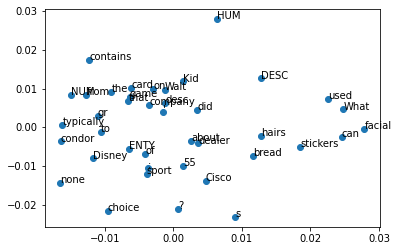

<Figure size 3600x3600 with 0 Axes>

In [182]:

X = feature_vec_model[feature_vec_model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(feature_vec_model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.figure(figsize=(50, 50))
pyplot.show()

In [192]:
vector_list = []
sent_vect_lookup = []
for sent in feature_conc:
    sent_vect_list = []
    for word in sent:
        if word in feature_vec_model.wv.vocab:
            sent_vect_list.append(feature_vec_model[word])
        else:
            sent_vect_list.append(np.zeros(50))
    sent_vect = np.concatenate([word_v for word_v in sent_vect_list])
    vector_list.append(sent_vect)
    sent_vect_lookup.append((sent, sent_vect))
            

/home/komal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [190]:
sent_vect_lookup

[(['typically',
   'contains',
   'about',
   '55',
   'hairs',
   '?',
   'HUM',
   'condor',
   '?',
   'DESC',
   ':',
   'desc',
   'What',
   'facial'],
  array([-8.10413621e-03,  2.81296729e-04, -2.33339355e-03,  7.46385055e-03,
         -1.79263542e-03, -9.81504284e-03, -2.47659185e-03, -3.52056930e-03,
         -3.80113139e-03, -9.30464547e-03,  7.35443842e-04, -5.57887834e-03,
         -2.99578835e-03, -5.21260453e-03, -8.81474651e-03, -7.50114070e-03,
          2.61570630e-03, -4.92906023e-04, -2.77333031e-03,  6.15435047e-03,
          9.02354345e-03,  3.43264709e-03,  6.30557444e-03, -8.55762511e-03,
         -4.95209964e-03,  1.49255828e-03,  8.38183332e-03, -9.71223600e-03,
          5.77930768e-04,  7.12594576e-03,  4.17432794e-03,  2.31429166e-03,
         -5.56962471e-03,  3.89373000e-03, -1.55426166e-03,  1.61743991e-03,
          3.78510961e-03, -5.63463708e-03,  4.12717462e-03,  9.70366504e-03,
          1.57830931e-04, -7.47357262e-03, -7.36970280e-04, -3.03418888e

In [194]:
len(vector_list)

4

## Now that we have defined each sentence in the vector space , we can perform clustering to bundle together sentences with similar meaning.

In [202]:
kmeans = MiniBatchKMeans(n_clusters = 3,batch_size=2,random_state=0).fit(vector_list)

In [203]:
centroids = kmeans.cluster_centers_
centroids

array([[-2.43254052e-03, -2.47512409e-03, -1.46022392e-03, ...,
         4.01198072e-03,  8.15377757e-03,  4.80896467e-03],
       [-8.59446968e-03, -1.56994230e-04,  3.37173619e-04, ...,
         4.91222879e-03,  9.89921950e-03,  6.21454930e-03],
       [ 6.63064793e-03,  4.31383215e-03,  5.71671594e-03, ...,
         2.05988227e-03, -6.99817017e-03,  3.60230479e-05]])

## Clustering the query results for the word "feature"

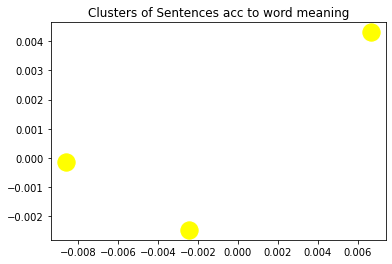

In [204]:
import matplotlib.pyplot as plt
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Sentences acc to word meaning')
plt.show()

## Cluster assignment of sentences

![clustering](Images/clustering.png)

In [211]:
for sent in feature_results:
    print(sent)
    print('****')
print('-' * 20)
print('predicted labels')
print('-' * 20)
print(kmeans.labels_)

['ingspan', 'of', 'a', 'condor', '?', 'DESC', ':', 'desc', 'What', 'facial', 'feature', 'typically', 'contains', 'about', '55', 'hairs', '?', 'HUM', ':', 'ind']
****
['an', 'hand', '?', 'HUM', ':', 'gr', 'What', 'bread', 'company', 'used', 'to', 'feature', 'stickers', 'of', 'the', 'Cisco', 'Kid', 'on', 'the', 'ends', 'of', 'thei']
****
['fireplug', 'come', 'from', '?', 'DESC', ':', 'desc', 'What', 'facial', 'feature', 'did', 'Walt', 'Disney', 'sport', 'that', 'none', 'of', 'Disney', "'", 's']
****
['ca', 'and', 'Asia', '?', 'ENTY', ':', 'sport', 'What', 'card', 'game', 'can', 'feature', 'dealer', "'", 's', 'choice', '?', 'NUM', ':', 'count', 'How', 'many', 'Amer']
****
--------------------
predicted labels
--------------------
[1 2 1 0]


## Picking representative samples from each cluster to diversify context of concordance output

![diverse](Images/diversifed_concordance.png)

In [218]:
captured_class = set()
new_result = []
for index in range(len(feature_results)):
    if kmeans.labels_[index] not in captured_class:
        new_result.append(feature_results[index])
        captured_class.add(kmeans.labels_[index])

for sent in new_result:
    print(sent)
    print('_' * 50)

['ingspan', 'of', 'a', 'condor', '?', 'DESC', ':', 'desc', 'What', 'facial', 'feature', 'typically', 'contains', 'about', '55', 'hairs', '?', 'HUM', ':', 'ind']
__________________________________________________
['an', 'hand', '?', 'HUM', ':', 'gr', 'What', 'bread', 'company', 'used', 'to', 'feature', 'stickers', 'of', 'the', 'Cisco', 'Kid', 'on', 'the', 'ends', 'of', 'thei']
__________________________________________________
['ca', 'and', 'Asia', '?', 'ENTY', ':', 'sport', 'What', 'card', 'game', 'can', 'feature', 'dealer', "'", 's', 'choice', '?', 'NUM', ':', 'count', 'How', 'many', 'Amer']
__________________________________________________


# <span style = "color:green">STAGE 3</span>

## FINAL DELIVERABLES

- The final deliverable for this project is a python 3 package that can help explore concordances of any user defined corpus.

- Graphical User Interface

The inspiration for GUI comes from the current open source concordancers in use.

![ant_conc](Images/ant_conc.png)


![casualconc](Images/casualconc.png)

# Thank you!